In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full,y_test = train_test_split(housing.data,housing.target,random_state = 42)
X_train,X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape =[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [10]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics =['mae'])

C:\Users\rahul\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
model_history = model.fit(X_train,y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [12]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 753us/step - loss: 0.3942 - mae: 0.4502


In [13]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293243408203,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.4636021554470062,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7126054763793945,
  0.6880088448524475,
  0.5803285837173462,
  0.516608536243

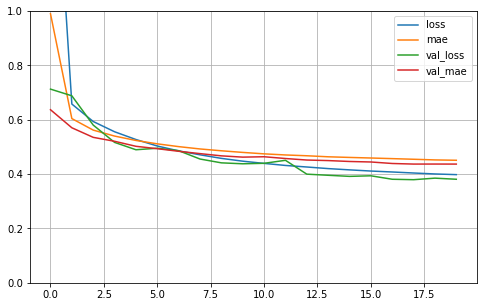

In [14]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
X_new = X_test[:3]

In [16]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.53287673]
 [1.8915396 ]
 [3.4040868 ]]
[0.477   0.458   5.00001]


In [17]:
del model

In [18]:
keras.backend.clear_session()

In [19]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_],outputs =[output])

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [21]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr= 1e-3),
             metrics = ['mae'])

C:\Users\rahul\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [22]:
model_history = model.fit(X_train, y_train,epochs =50,validation_data=(X_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/50
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [23]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 760us/step - loss: 0.3607 - mae: 0.4263


In [24]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.626488208770752,
  0.5877465605735779,
  0.5565561056137085,
  0.5311980247497559,
  0.5107864141464233,
  0.4951668083667755,
  0.4802228510379791,
  0.4684668779373169,
  0.45896390080451965,
  0.45022013783454895,
  0.4432655870914459,
  0.4363251030445099,
  0.4306240975856781,
  0.42534440755844116,
  0.4212935268878937,
  0.41681814193725586,
  0.4126456081867218,
  0.4095860719680786,
  0.40596330165863037,
  0.4029441177845001,
  0.4000454246997833,
  0.3971883952617645,
  0.3946213722229004,
  0.39249086380004883,
  0.3904934525489807,
  0.38845276832580566,
  0.3867104947566986,
  0.38484394550323486,
  0.38295263051986694,
  0.3815838396549225,
  0.38052698969841003,
  0.3787004351615906,
  0.3775610029697418,
  0.3762996792793274,
  0.3750821352005005,
  0.3740888237953186,
  0.37281912565231323,
  0.37164339423179626,
  0.37105101346969604,
  0.37027257680892944,
  0.36904579401016235,
  0.3680413067340851,
  0.367731

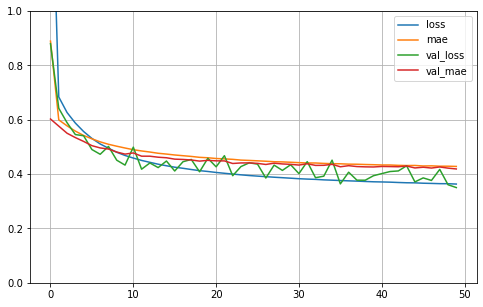

In [25]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
model.save(" my_model.h5")

In [27]:
%pwd

'C:\\Users\\rahul\\Desktop\\Machine Learning'

In [48]:
del model

In [50]:
keras.backend.clear_session()

In [30]:
model = keras.models.load_model(" my_model.h5")

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [32]:
y_pred = model.predict(X_new)

In [33]:
print(y_pred)

[[0.773522 ]
 [1.7190881]
 [3.8588157]]


In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape =[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [53]:
model.compile(loss="mse",optimizer = keras.optimizers.SGD(learning_rate=1e-3))

In [54]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model -{epoch:02d}.h5")

In [55]:
histoy = model.fit(X_train,y_train,epochs =10,
                  validation_data=(X_valid,y_valid),
                   callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4474 - val_loss: 0.4379

In [58]:
del model
keras.backend.clear_session()

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape =[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [60]:
model.compile(loss="mse",optimizer = keras.optimizers.SGD(learning_rate=1e-3))

In [62]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5",save_best_only=True)

In [63]:
histoy = model.fit(X_train,y_train,epochs =10,
                  validation_data=(X_valid,y_valid),
                   callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8542 - val_loss: 1.3779
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7854 - val_loss: 0.6885
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6817 - val_loss: 0.6645
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6283 - val_loss: 0.5944
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5868 - val_loss: 0.5505
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5510 - val_loss: 0.5211
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5225 - val_loss: 0.5055
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4993 - val_loss: 0.4648
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4803 - val_loss: 0.4442
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4649 - val_loss: 0.4304

In [72]:
del model
keras.backend.clear_session()

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape =[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)])

In [74]:
model.compile(loss="mse",optimizer = keras.optimizers.SGD(learning_rate=1e-3))

In [75]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only=True)

In [70]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,restore_best_weights = True)

In [76]:
histoy = model.fit(X_train,y_train,epochs =200,
                  validation_data=(X_valid,y_valid),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 1ms/step - loss: 2.0148 - val_loss: 1.4007
Epoch 2/200
363/363 [==============================] - 0s 1ms/step - loss: 0.7735 - val_loss: 1.3632
Epoch 3/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6815 - val_loss: 0.8402
Epoch 4/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6134 - val_loss: 0.5897
Epoch 5/200
363/363 [==============================] - 0s 1ms/step - loss: 0.5652 - val_loss: 0.5373
Epoch 6/200
363/363 [==============================] - 0s 1ms/step - loss: 0.5242 - val_loss: 0.5175
Epoch 7/200
363/363 [==============================] - 0s 1ms/step - loss: 0.4955 - val_loss: 0.4717
Epoch 8/200
363/363 [==============================] - 0s 1ms/step - loss: 0.4729 - val_loss: 0.4582
Epoch 9/200
363/363 [==============================] - 0s 1ms/step - loss: 0.4546 - val_loss: 0.4201
Epoch 10/200
363/363 [==============================] - 0s 1ms/step - loss: 0.4411 - val_lo

In [78]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 796us/step - loss: 0.3888
